Training stopped at iteration 1683, no improvement.
Best result at iteration 1682:
Loss = 0.000208, k = 1.0168, b = 2.9619


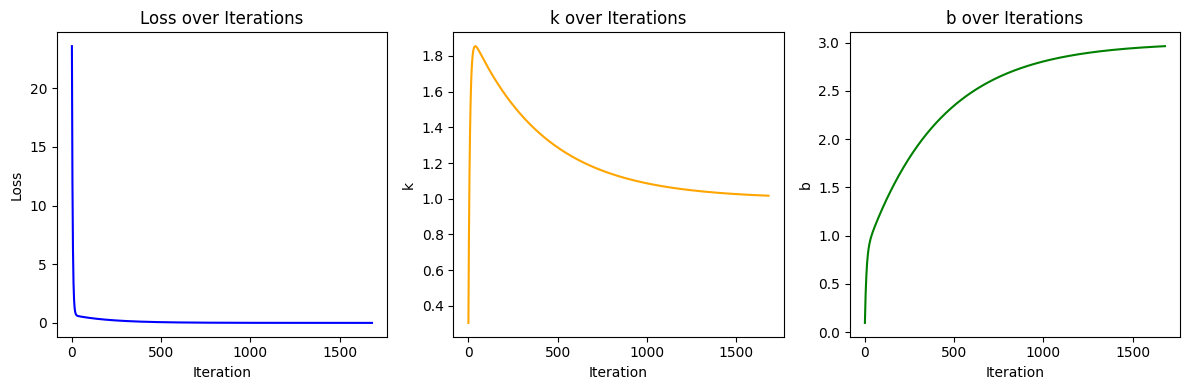

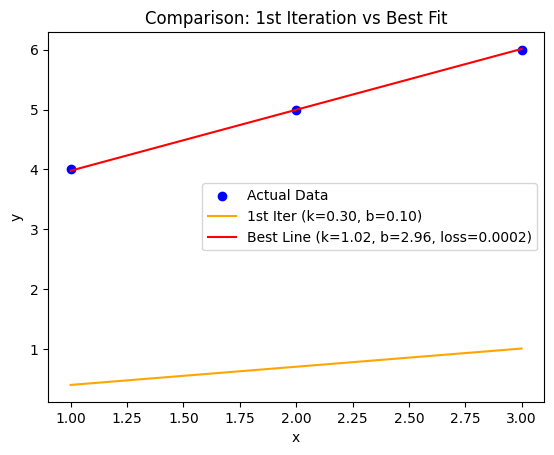

In [5]:
# ML FOR ONE NEURON
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [4, 5, 6]
k = 0.1
b = 0
l_rate = 0.01
max_iter = 10000
n = len(x)
losses = []
ks = []
bs = []

i = 0
best_loss = float("inf")   # smallest loss
best_k, best_b = k, b      # best parameters
tolerance = 1e-6           # stop if no improvement
first_k, first_b = None, None   # parameters after 1st iteration
while i < max_iter:
    # prediction
    y_pred = [k * x[j] + b for j in range(n)]

    # error
    error = [y[j] - y_pred[j] for j in range(n)]

    # loss function
    loss_function = sum([e**2 for e in error]) / n

    # save best loss or stop if no improvement
    if loss_function < best_loss - tolerance:
        best_loss = loss_function
        best_k, best_b = k, b
        best_iter = i
    else:
        print(f"Training stopped at iteration {i}, no improvement.")
        break

    # gradients
    dk = (-2/n) * sum([error[j]*x[j] for j in range(n)])
    db = (-2/n) * sum(error)

    # update parameters
    k = k - l_rate * dk
    b = b - l_rate * db

    # save history
    losses.append(loss_function)
    ks.append(k)
    bs.append(b)

    # save parameters after 1st iteration
    if i == 0:
        first_k, first_b = k, b

    i += 1

print(f"Best result at iteration {best_iter}:")
print(f"Loss = {best_loss:.6f}, k = {best_k:.4f}, b = {best_b:.4f}")

# ---- Graphs ----
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(losses, color='blue')
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1,3,2)
plt.plot(ks, color='orange')
plt.title("k over Iterations")
plt.xlabel("Iteration")
plt.ylabel("k")

plt.subplot(1,3,3)
plt.plot(bs, color='green')
plt.title("b over Iterations")
plt.xlabel("Iteration")
plt.ylabel("b")

plt.tight_layout()
plt.show()

# ---- Compare 1st iteration and best result ----
plt.scatter(x, y, color='blue', label="Actual Data")

# 1st iteration line
if first_k is not None:
    y_line_first = [first_k*xx + first_b for xx in x]
    plt.plot(x, y_line_first, color='orange',
             label=f"1st Iter (k={first_k:.2f}, b={first_b:.2f})")

# Best line
x_line = [min(x), max(x)]
y_line = [best_k*xx + best_b for xx in x_line]
plt.plot(x_line, y_line, color='red',
         label=f"Best Line (k={best_k:.2f}, b={best_b:.2f}, loss={best_loss:.4f})")

plt.title("Comparison: 1st Iteration vs Best Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Linear stop iteration is : 1758, last Loss = 0.00020777911838925812
Sigmoid stop iteration is : 10000, last Loss = 16.678824110647437
ReLU stop iteration is : 1758, last Loss = 0.00020777911838925812
Tanh stop iteration is : 5433, last Loss = 16.672011666891724


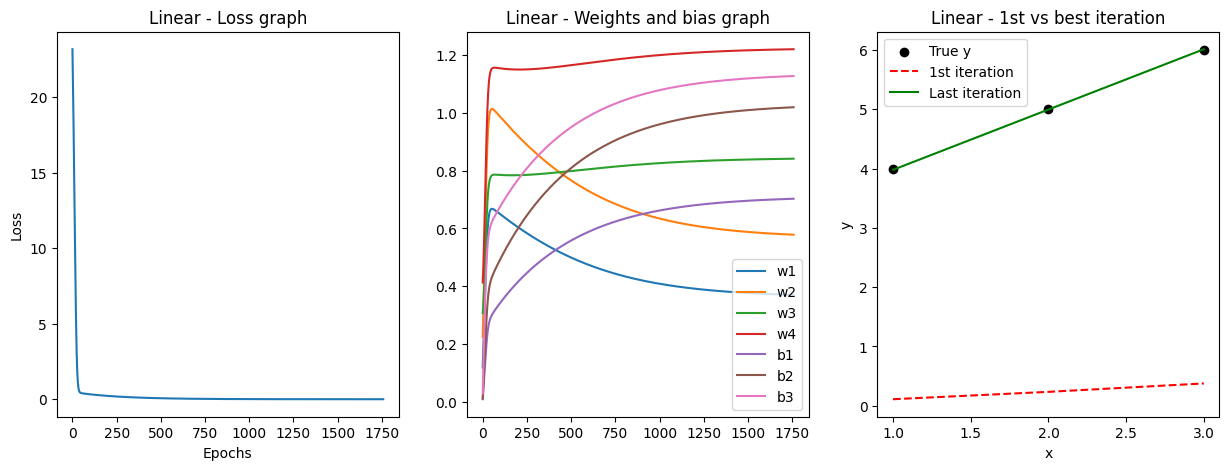

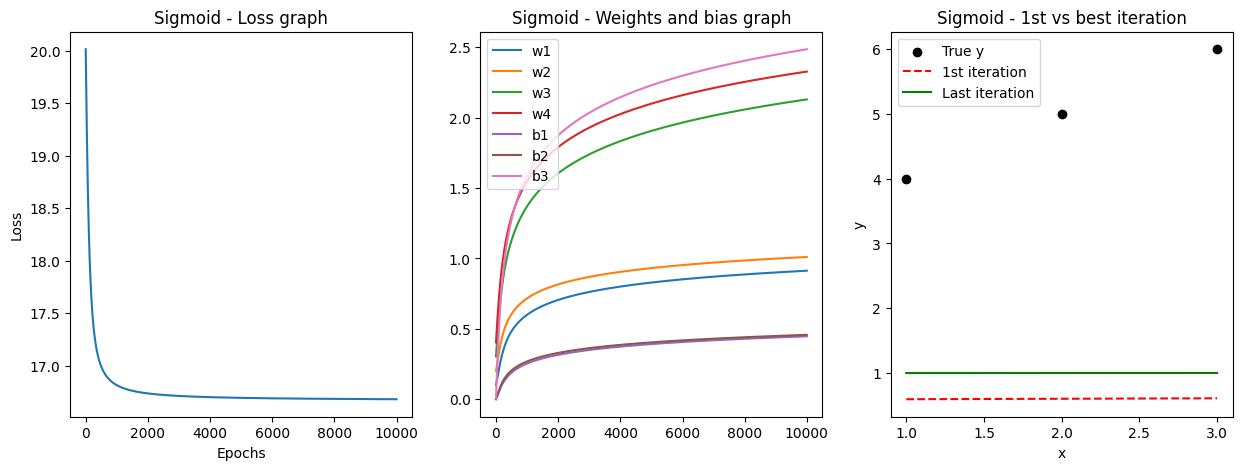

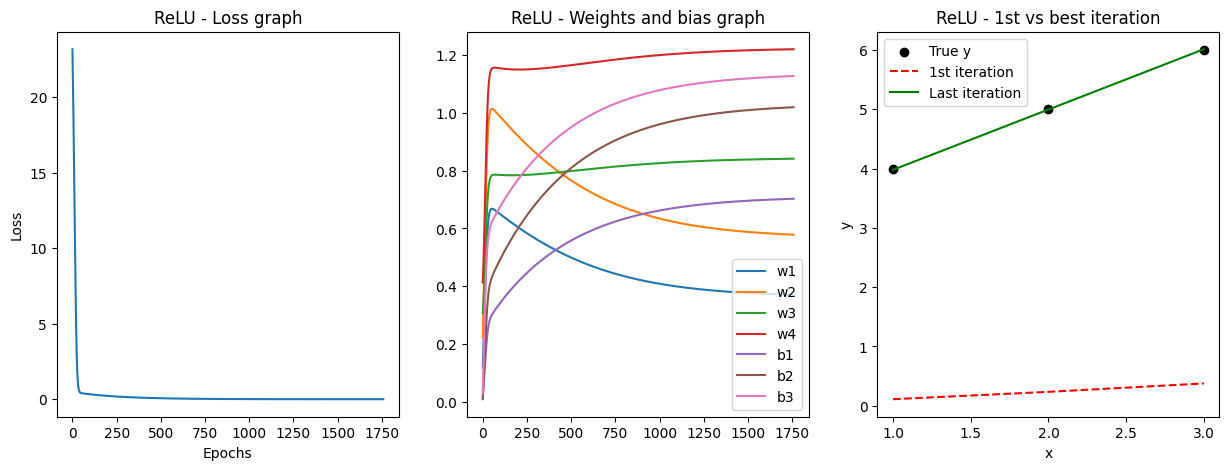

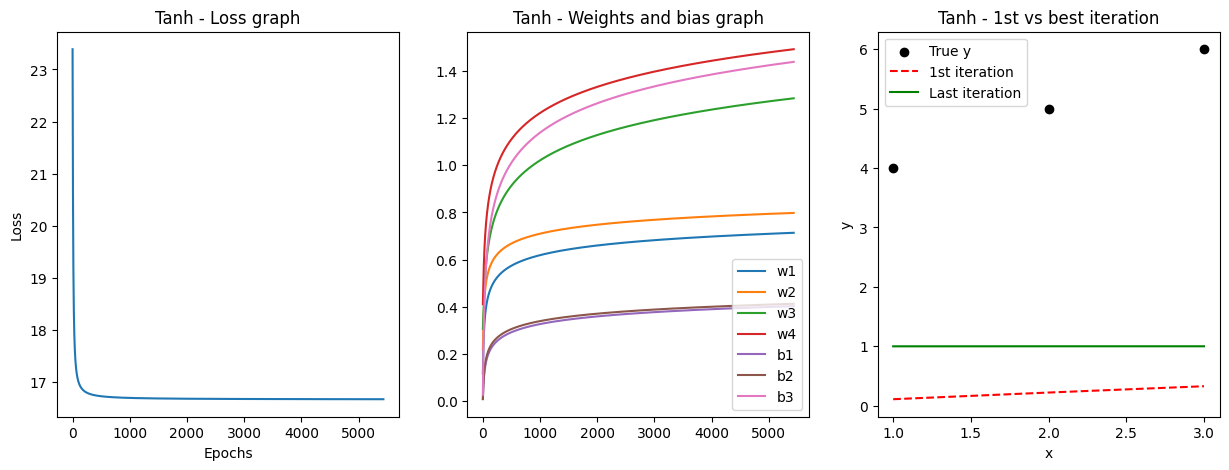

In [3]:
import math
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [4, 5, 6]

#Activation Functions
def linear(z):
    return z
def linear_derivative(z):
    return 1

def sigmoid(z):
    return 1 / (1 + math.exp(-z))
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return z if z > 0 else 0
def relu_derivative(z):
    return 1 if z > 0 else 0

def tanh_manual(z):
    ez = math.exp(z)
    emz = math.exp(-z)
    return (ez - emz) / (ez + emz)
def tanh_derivative_manual(z):
    t = tanh_manual(z)
    return 1 - t**2

#Loss function
def mse(y_true, y_pred):
    n = len(y_true)
    return sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n

#Traning model
def train_network(activation, activation_derivative, max_iter=10000, l_rate=0.001, tol=1e-6):
    #1st weight and bias
    w1, w2, w3, w4 = 0.1, 0.2, 0.3, 0.4
    b1, b2, b3 = 0.0, 0.0, 0.0

    losses = []
    preds_history = []

    #Save to array each iteration
    w1_massiv, w2_massiv, w3_massiv, w4_massiv = [], [], [], []
    b1_massiv, b2_massiv, b3_massiv = [], [], []

    epoch = 0
    prev_loss = float("inf")

    while epoch < max_iter:
        total_loss = 0
        preds = []

        for xi, yi in zip(x, y):
            #Forward propagation
            z1 = w1 * xi + b1
            a1 = activation(z1)

            z2 = w2 * xi + b2
            a2 = activation(z2)

            z_out = w3 * a1 + w4 * a2 + b3
            y_pred = activation(z_out)
            preds.append(y_pred)

            #Loss
            total_loss += (yi - y_pred) ** 2

            #Back propagation
            dL_dy = -2 * (yi - y_pred)  # dL/dy_pred
            dy_dzout = activation_derivative(z_out)
            delta_out = dL_dy * dy_dzout

            # w3, w4, b3
            dL_dw3 = delta_out * a1
            dL_dw4 = delta_out * a2
            dL_db3 = delta_out

            #1-hidden neuron
            dz1 = activation_derivative(z1)
            delta1 = delta_out * w3 * dz1
            dL_dw1 = delta1 * xi
            dL_db1 = delta1

            #2-hidden neuron
            dz2 = activation_derivative(z2)
            delta2 = delta_out * w4 * dz2
            dL_dw2 = delta2 * xi
            dL_db2 = delta2

            #Update weight and bias
            w3 -= l_rate * dL_dw3
            w4 -= l_rate * dL_dw4
            b3 -= l_rate * dL_db3

            w1 -= l_rate * dL_dw1
            b1 -= l_rate * dL_db1
            w2 -= l_rate * dL_dw2
            b2 -= l_rate * dL_db2

        #Average loss
        avg_loss = total_loss / len(x)
        losses.append(avg_loss)
        preds_history.append(preds.copy())

        #Save to array
        w1_massiv.append(w1)
        w2_massiv.append(w2)
        w3_massiv.append(w3)
        w4_massiv.append(w4)
        b1_massiv.append(b1)
        b2_massiv.append(b2)
        b3_massiv.append(b3)

        if abs(prev_loss - avg_loss) < tol:
            break
        prev_loss = avg_loss
        epoch += 1

    return losses, (w1_massiv, w2_massiv, w3_massiv, w4_massiv, b1_massiv, b2_massiv, b3_massiv), epoch, preds_history


# --- Активациялар ---
activations = {
    "Linear": (linear, linear_derivative),
    "Sigmoid": (sigmoid, sigmoid_derivative),
    "ReLU": (relu, relu_derivative),
    "Tanh": (tanh_manual, tanh_derivative_manual)
}

results = {}
for name, (act, dact) in activations.items():
    losses, weights_biases, stop_epoch, preds_history = train_network(act, dact)
    results[name] = (losses, weights_biases, stop_epoch, preds_history)
    print(f"{name} stop iteration is : {stop_epoch}, last Loss = {losses[-1]}")

#Graphs
for name, (losses, (w1m, w2m, w3m, w4m, b1m, b2m, b3m), stop_epoch, preds_history) in results.items():
    plt.figure(figsize=(15,5))

    # Loss
    plt.subplot(1,3,1)
    plt.plot(losses)
    plt.title(f"{name} - Loss graph")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Weights & Bias
    plt.subplot(1,3,2)
    plt.plot(w1m, label="w1")
    plt.plot(w2m, label="w2")
    plt.plot(w3m, label="w3")
    plt.plot(w4m, label="w4")
    plt.plot(b1m, label="b1")
    plt.plot(b2m, label="b2")
    plt.plot(b3m, label="b3")
    plt.legend()
    plt.title(f"{name} - Weights and bias graph")

    # Result of 1st and the best iteration
    plt.subplot(1,3,3)
    plt.scatter(x, y, color="black", label="True y")
    plt.plot(x, preds_history[0], "r--", label="1st iteration")
    plt.plot(x, preds_history[-1], "g-", label="Last iteration")
    plt.legend()
    plt.title(f"{name} - 1st vs best iteration")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()


In [4]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

def classification_metrics(y_true, y_pred, threshold=0.5):

    y_pred_bin = [1 if yp >= threshold else 0 for yp in y_pred]
    y_true_bin = [1 if yt >= threshold else 0 for yt in y_true]

    acc = accuracy_score(y_true_bin, y_pred_bin)
    rec = recall_score(y_true_bin, y_pred_bin, zero_division=0)
    f1 = f1_score(y_true_bin, y_pred_bin, zero_division=0)

    return acc, rec, f1

for name, (losses, (w1m, w2m, w3m, w4m, b1m, b2m, b3m), stop_epoch, preds_history) in results.items():
    last_preds = preds_history[-1]
    acc, rec, f1 = classification_metrics(y, last_preds)

    print(f"{name} stop iteration = {stop_epoch}")
    print(f"  Last Loss = {losses[-1]:.4f}")
    print(f"  Accuracy  = {acc:.4f}")
    print(f"  Recall    = {rec:.4f}")
    print(f"  F1-score  = {f1:.4f}")
    print("-"*40)


Linear stop iteration = 1758
  Last Loss = 0.0002
  Accuracy  = 1.0000
  Recall    = 1.0000
  F1-score  = 1.0000
----------------------------------------
Sigmoid stop iteration = 10000
  Last Loss = 16.6788
  Accuracy  = 1.0000
  Recall    = 1.0000
  F1-score  = 1.0000
----------------------------------------
ReLU stop iteration = 1758
  Last Loss = 0.0002
  Accuracy  = 1.0000
  Recall    = 1.0000
  F1-score  = 1.0000
----------------------------------------
Tanh stop iteration = 5433
  Last Loss = 16.6720
  Accuracy  = 1.0000
  Recall    = 1.0000
  F1-score  = 1.0000
----------------------------------------
